<a href="https://colab.research.google.com/github/L120Git/Deep_Learning_Airbnb/blob/main/1_carga_y_an%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras

In [ ]:
import numpy as np
import pandas as pd
#para representar la matriz de correlación
import seaborn as sns
#para descargar las imagenes
import imageio as io
import cv2
#para representar gráficas
import matplotlib.pyplot as plt

#para preprocesar
from sklearn import preprocessing
#para dividir los datos
from sklearn.model_selection import train_test_split
#para entrar redes
import tensorflow as tf
from tensorflow import keras
#convertir un vector en una matriz binaria
from keras.utils import to_categorical #no lo uso
#para evaluar
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-03-13 09:29:10--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [        <=>         ]  54.31M   915KB/s    in 63s     

2023-03-13 09:30:18 (889 KB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [ ]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,-,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,NaN,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [ ]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape

(14001, 89)

In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Voy a filtrar por Madrid el dataset porque he observado errores en 'City'


In [ ]:
#observo si hay filas que no pertenecen a Madrid
print(f'Hay', (data['City'] != 'Madrid').sum(), 'filas que no son de Madrid')

Hay 794 filas que no son de Madrid


In [ ]:
#elimino esas filas
data_mad = data.loc[data['City']=='Madrid']
#compruebo que las he eliminado
(data_mad['City'] != 'Madrid').sum()

0

In [ ]:
# vamos a ver las medidas del data_mad
data_mad.shape

(13207, 89)

In [ ]:
#reseteo los indices para que no haya problemas después al descargar las imagenes
data_mad = data_mad.reset_index()

Cargamos las imágenes del entrenamiento en un array para tenerlas disponibles luego

In [ ]:
# montamos GDrive para almacenar las imagenes que descarguemos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data_mad['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images_aux = cv2.resize(img, (224, 224))
        if images_aux.shape == (224, 224, 3):
          images[i_aux]=images_aux
          good_urls.append(i_img)
          i_aux += 1
          print(f'Imagen {i_img} descargada')
          print(len(good_urls))
        else:
          pass
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 3 descargada
4
Imagen 4 descargada
5
Imagen 5 descargada
6
Imagen 7 descargada
7
Imagen 8 descargada
8
Imagen 10 descargada
9
Imagen 11 descargada
10
Imagen 12 descargada
11
Imagen 13 descargada
12
Imagen 14 descargada
13
Imagen 15 descargada
14
Imagen 16 descargada
15
Imagen 18 descargada
16
Imagen 19 descargada
17
Imagen 20 descargada
18
Imagen 21 descargada
19
Imagen 24 descargada
20
Imagen 25 descargada
21
Imagen 27 descargada
22
Imagen 33 descargada
23
Imagen 35 descargada
24
Imagen 36 descargada
25
Imagen 37 descargada
26
Imagen 41 descargada
27
Imagen 42 descargada
28
Imagen 44 descargada
29
Imagen 47 descargada
30
Imagen 48 descargada
31
Imagen 49 descargada
32
Imagen 51 descargada
33
Imagen 54 descargada
34
Imagen 57 descargada
35
Imagen 59 descargada
36
Imagen 61 descargada
37
Imagen 62 descargada
38
Imagen 64 descargada
39
Imagen 67 descargada
40
Imagen 69 descargada
41
Imagen 70 descargada
42
Imagen 72

In [ ]:
# Visualizamos las imágenes cargadas
print(images.shape)

(1000, 224, 224, 3)


In [ ]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data_mad.iloc[good_urls, :]

In [ ]:
print(final_data.shape)

(1000, 90)


In [ ]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', images)
np.save('final_data.npy', final_data)
np.save('good_url.npy', good_urls)

In [ ]:
# almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/MyDrive/DL/images.npy
!cp final_data.npy /content/drive/MyDrive/DL/final_data.npy
!cp good_url.npy /content/drive/MyDrive/DL/good_url.npy


In [ ]:
!ls -lah images.npy final_data.npy good_url.npy

-rw-r--r-- 1 root root 3.8M Mar 13 09:45 final_data.npy
-rw-r--r-- 1 root root 8.0K Mar 13 09:45 good_url.npy
-rw-r--r-- 1 root root 144M Mar 13 09:45 images.npy


In [ ]:
#Elimino del dataset la variable de las urls porque ya no la necesito

final_data = final_data.drop(['Thumbnail Url'], axis=1)
final_data.head(3)

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."


### División de los datos

In [ ]:
#Divido entre train y test
train, test = train_test_split(final_data, test_size=0.2, shuffle=True, random_state=42)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

#guardo los CSV en local
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (800, 89)
Dimensiones del dataset de test: (200, 89)


In [ ]:
#compruebo que tengo los indices originales
train.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
47,47,13464977,https://www.airbnb.com/rooms/13464977,20170407214119,2017-04-08,Lovely apartment next to the Royale Palace,"Nice, modern apartment at the heart of the cen...",I provide all you can need at the apartartment...,"Nice, modern apartment at the heart of the cen...",none,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.47,"40.41502683932799,-3.712506777753237","Host Has Profile Pic,Is Location Exact,Require..."
814,878,4408597,https://www.airbnb.com/rooms/4408597,20170407214119,2017-04-08,PRECIOSO ATICO CON TERRAZA,Preciosa casa situada en el barrio de Salamanc...,Situado en una de las mejores y zona Señorial ...,Preciosa casa situada en el barrio de Salamanc...,none,...,10.0,9.0,8.0,NaN,NaN,moderate,1,0.12,"40.42756868925818,-3.6861979252237353","Host Has Profile Pic,Host Identity Verified,Is..."
1085,1149,14856071,https://www.airbnb.com/rooms/14856071,20170407214119,2017-04-08,PROMOCIÓN SEMANA SANTA EN CHAMBERI. CENTRO MAD...,Lugares de interés: in downtown!! near to the ...,"Es una Habitaciòn interior sin ventanas, pero ...",Lugares de interés: in downtown!! near to the ...,none,...,NaN,NaN,NaN,NaN,NaN,flexible,2,0.17,"40.437253669584415,-3.701998495343298","Host Has Profile Pic,Host Identity Verified,Re..."
854,918,12187486,https://www.airbnb.com/rooms/12187486,20170407214119,2017-04-08,Centro_LaLatina_Piso con encanto*Incluye desay...,Bonita habitación en piso antiguo con encanto....,El piso es un piso antiguo con encanto y muy a...,Bonita habitación en piso antiguo con encanto....,none,...,10.0,10.0,9.0,NaN,NaN,flexible,1,1.63,"40.41363323316737,-3.708382255201784","Host Has Profile Pic,Host Identity Verified,Re..."
1303,1380,14356759,https://www.airbnb.com/rooms/14356759,20170407214119,2017-04-08,APARTMENT COMFORTABLE VERY CENTRAL 1 BEDROOM,"Apartment ideal for a holiday in Madrid, centr...",Frequently asked questions: the accommodation ...,"Apartment ideal for a holiday in Madrid, centr...",none,...,10.0,9.0,9.0,NaN,NaN,strict,2,3.73,"40.39701342408578,-3.711650288131291","Host Has Profile Pic,Host Identity Verified,Is..."


In [ ]:
test.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
786,850,6012785,https://www.airbnb.com/rooms/6012785,20170407214119,2017-04-08,Luxury and wide room(14) in GranVía,Spacious room in luxury and recently apartmen...,Spacious room with the window to an interior c...,Spacious room in luxury and recently apartmen...,none,...,10.0,8.0,6.0,NaN,NaN,strict,38,0.10,"40.419166227167565,-3.699832448836666","Host Has Profile Pic,Is Location Exact,Require..."
1148,1212,6470318,https://www.airbnb.com/rooms/6470318,20170407214119,2017-04-08,Habitación interior .wifi,"Esta habitación . , cama 135 cm x 190 cm, es i...",NaN,"Esta habitación . , cama 135 cm x 190 cm, es i...",none,...,10.0,10.0,10.0,NaN,NaN,flexible,2,3.60,"40.42234504195288,-3.6973619959416792","Host Is Superhost,Host Has Profile Pic,Require..."
1152,1216,15066726,https://www.airbnb.com/rooms/15066726,20170407214119,2017-04-08,"Centro Madrid, gran vía, malasaña",Precioso y acogedor apartamento en pleno cora...,NaN,Precioso y acogedor apartamento en pleno cora...,none,...,10.0,10.0,10.0,NaN,NaN,strict,9,1.84,"40.422285111509964,-3.7076464229069788","Host Has Profile Pic,Requires License,Instant ..."
1022,1086,15081897,https://www.airbnb.com/rooms/15081897,20170407214119,2017-04-08,Love Huertas,Apartamento en pleno centro histórico de Madri...,"Apartamento exterior, con mucha luz, con ampli...",Apartamento en pleno centro histórico de Madri...,none,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.76,"40.41228770222658,-3.6989316250797732","Host Is Superhost,Host Has Profile Pic,Host Id..."
630,692,17215188,https://www.airbnb.com/rooms/17215188,20170407214119,2017-04-08,Apartamento en el centro cool de madrid o nego...,Apartamento muy còmodo en la zona mas cool de ...,"El apartamento esta bien conectado , estacion ...",Apartamento muy còmodo en la zona mas cool de ...,none,...,9.0,10.0,9.0,NaN,NaN,moderate,1,5.00,"40.423857414172716,-3.6960182660276586","Host Has Profile Pic,Is Location Exact,Require..."


### Cargamos los datos de train 

In [ ]:
#cargo los datos de train para trabajar con ellos
#df_train = pd.read_csv('./train.csv', sep=';', decimal='.') #OJO! si cargo el csv me cambia los indices porque lee de nuevo y hace un df del csv
df_train = train
df_train.shape

(800, 89)

### Análisis exploratorio de train

In [ ]:
#eliminar variables irrelevantes para el modelo, las 4 últimas son fruto de una regularización anterior por lasso
df_train = df_train.drop(['Neighbourhood','City','Zipcode','ID','Listing Url','Scrape ID','Last Scraped',
                                  'Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview',
                                  'Notes','Amenities','Square Feet','Transit','Access' ,'Interaction', 'House Rules' ,
                                  'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 
                                  'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time',
                                  'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 
                                  'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications',
                                  'Street','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code',
                                  'Country','Latitude','Longitude', 'Security Deposit','Cleaning Fee',
                                  'Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30',
                                  'Availability 60','Availability 90','Availability 365','Calendar last Scraped', 
                                  'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness',
                                  'Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication',
                                  'Review Scores Location','Review Scores Value','License','Jurisdiction Names',
                                  'Calculated host listings count','Reviews per Month','Geolocation','Features','Guests Included', 
                                  'Cancellation Policy','Bed Type','Property Type' ], axis=1)
df_train.columns

Index(['index', 'Neighbourhood Cleansed', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Extra People',
       'Number of Reviews', 'Review Scores Rating'],
      dtype='object')

In [ ]:
#renombro las columnas
df_train.columns=['index','Neighbourhood_Cleansed', 'Room_Type','Accommodates',
                  'Bathrooms', 'Bedrooms', 'Beds','Price','Extra_People',
                      'Number_of_Reviews', 'Review_Scores_Rating']

In [ ]:
#búsqueda de valores nulos
df_train.isnull().any()

index                     False
Neighbourhood_Cleansed    False
Room_Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Price                     False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating       True
dtype: bool

In [ ]:
#contabilizo los valores nulos
print(f'Bathrooms tiene: ', df_train['Bathrooms'].isnull().sum())
print(f'Bedrooms tiene: ', df_train['Bedrooms'].isnull().sum())
print(f'Beds tiene: ', df_train['Beds'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_train['Review_Scores_Rating'].isnull().sum())

Bathrooms tiene:  3
Bedrooms tiene:  2
Beds tiene:  4
Review_Scores_Rating tiene:  171


In [ ]:
#Imputación de valores nulos por la moda
df_train["Bathrooms"].fillna(df_train["Bathrooms"].mode()[0], inplace=True)
df_train["Bedrooms"].fillna(df_train["Bedrooms"].mode()[0], inplace=True)
df_train["Beds"].fillna(df_train["Beds"].mode()[0], inplace=True)
df_train["Review_Scores_Rating"].fillna(df_train["Review_Scores_Rating"].mode()[0], inplace=True) 
#compruebo
print(f'Bathrooms tiene: ', df_train['Bathrooms'].isnull().sum())
print(f'Bedrooms tiene: ', df_train['Bedrooms'].isnull().sum())
print(f'Beds tiene: ', df_train['Beds'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_train['Review_Scores_Rating'].isnull().sum())

Bathrooms tiene:  0
Bedrooms tiene:  0
Beds tiene:  0
Review_Scores_Rating tiene:  0


In [ ]:
#codificación de variables categóricas
df_train.dtypes

index                       int64
Neighbourhood_Cleansed     object
Room_Type                  object
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [ ]:
#utilizo MeanEncoder para imputar con la media de la variable objetivo, menos las imagenes
categorical = ['Neighbourhood_Cleansed', 'Room_Type']

mean_map = {}
for c in categorical:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map[c] = mean
df_train.dtypes

index                       int64
Neighbourhood_Cleansed    float64
Room_Type                 float64
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [ ]:
df_train

,index,Neighbourhood_Cleansed,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Extra_People,Number_of_Reviews,Review_Scores_Rating
47,47,72.416667,84.155556,4,1.0,1.0,2.0,65.0,10,14,99.0
814,878,94.142857,84.155556,4,2.0,3.0,4.0,220.0,30,3,80.0
1085,1149,75.565217,35.909366,2,1.0,1.0,1.0,29.0,0,1,100.0
854,918,72.416667,35.909366,1,1.0,1.0,1.0,33.0,0,19,94.0
1303,1380,29.000000,84.155556,4,1.0,1.0,1.0,27.0,6,27,91.0
...,...,...,...,...,...,...,...,...,...,...,...
182,182,69.240741,35.909366,1,1.0,1.0,1.0,18.0,0,1,100.0
406,419,142.500000,84.155556,10,2.0,4.0,5.0,250.0,35,12,90.0
1338,1416,42.000000,35.909366,2,1.0,1.0,1.0,14.0,7,0,100.0
666,729,59.250000,35.909366,1,1.0,1.0,1.0,30.0,5,1,60.0


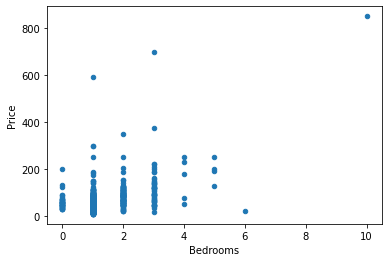

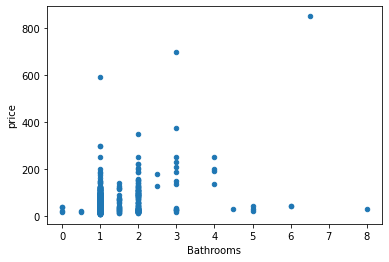

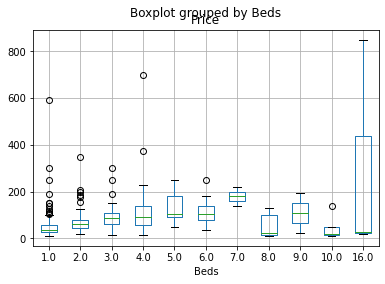

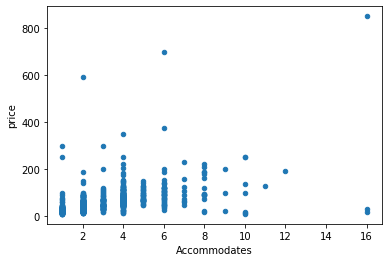

In [ ]:
#Observación y limpieza de outlaiers

#scatter Bedrooms x Price
df_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

#boxplot Bathrooms x Price
df_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('price')
plt.show()

#boxplot Beds x Price
df_train.boxplot(by='Beds',column = 'Price')
plt.show()

#boxplot Accommodates x Price
df_train.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price')
plt.show()


In [ ]:
#aplico filtros para reducir outliers
df_train_filter = df_train[(df_train['Bedrooms'] > 0) & (df_train['Bedrooms'] < 7)]
df_train_filter2 = df_train_filter[(df_train_filter['Bathrooms'] > 0) & (df_train_filter['Bathrooms'] < 4.5)]

df_train_filter4 = df_train_filter2[(df_train_filter2['Accommodates'] > 1) & (df_train_filter2['Accommodates'] < 11)]

In [ ]:
#análisis de correlación 
df_train_filter4.corr().T

,index,Neighbourhood_Cleansed,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Extra_People,Number_of_Reviews,Review_Scores_Rating
index,1.000000,-0.015342,-0.057048,-0.062547,-0.014265,-0.017026,-0.047642,-0.004704,0.062925,0.025837,-0.005315
Neighbourhood_Cleansed,-0.015342,1.000000,0.130327,0.096993,0.101570,0.075835,0.047155,0.284689,0.046191,0.053990,0.012307
Room_Type,-0.057048,0.130327,1.000000,0.448125,0.010398,0.337451,0.242369,0.390509,0.106050,0.128737,-0.059199
Accommodates,-0.062547,0.096993,0.448125,1.000000,0.367244,0.674309,0.832374,0.417398,0.303418,0.084060,-0.141073
Bathrooms,-0.014265,0.101570,0.010398,0.367244,1.000000,0.452280,0.387778,0.375712,0.137749,-0.027901,0.026792
Bedrooms,-0.017026,0.075835,0.337451,0.674309,0.452280,1.000000,0.668281,0.417874,0.148720,-0.014584,-0.093432
Beds,-0.047642,0.047155,0.242369,0.832374,0.387778,0.668281,1.000000,0.313727,0.254648,0.058469,-0.180252
Price,-0.004704,0.284689,0.390509,0.417398,0.375712,0.417874,0.313727,1.000000,0.049200,-0.036405,0.100235
Extra_People,0.062925,0.046191,0.106050,0.303418,0.137749,0.148720,0.254648,0.049200,1.000000,0.101389,-0.092435
Number_of_Reviews,0.025837,0.053990,0.128737,0.084060,-0.027901,-0.014584,0.058469,-0.036405,0.101389,1.000000,-0.089680


In [ ]:
df_train_filter4.index

Int64Index([  47,  814, 1085, 1303,  915,  263, 1427, 1288,  104, 1438,
            ...
             497,  327,  203,  951,   25, 1091,  112,  406, 1338,  174],
           dtype='int64', length=597)

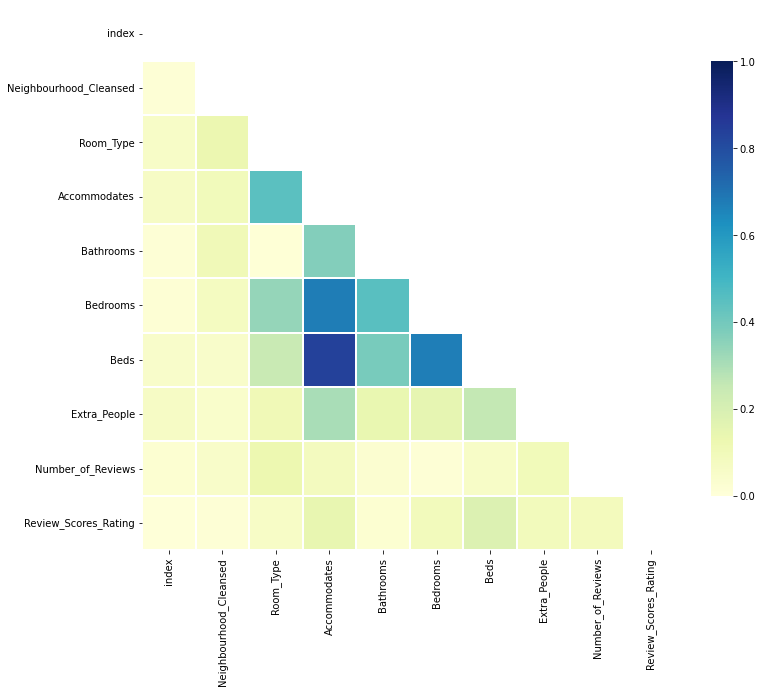

In [ ]:
# Compute the correlation matrix
corr = np.abs(df_train_filter4.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
#elimino Beds por colinealidad con accommodates
df_training= df_train_filter4.drop(['Beds'],axis=1)

In [ ]:
#veo las variables que me quedan
df_training.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Extra_People', 'Number_of_Reviews',
       'Review_Scores_Rating'],
      dtype='object')

In [ ]:
#las nuevas medidas del df
df_training.shape

(597, 10)

In [ ]:
df_training.fillna(0, inplace=True) #reemplazo los valores nulos a 0 por si los hubiera.

In [ ]:
df_training.isnull().values.any() #me aseguro de que no hay valores nulos

False

### División de los datos de entrenamiento, la etiqueta y 'Price' por un lado, el resto por otro.

In [ ]:
#Divido en X e y los datos del df
X_train =df_training.drop(['Price'], axis=1) # me defino un df sin la variable objetivo

# Obtener las etiquetas de regresion y_reg que la voy a llamar y_train
Y_train = df_training['Price'] #esta es mi variable objetivo

print('Filas, columnas', X_train.shape)
print('Filas, columnas', Y_train.shape)

Filas, columnas (597, 9)
Filas, columnas (597,)


## Cargo las imagenes de train para después

In [ ]:
#Busco las imagenes de los train para el modelo CNN
images = np.load('./images.npy')
good_url = np.load('./good_url.npy')
indices_train= X_train.index #obtengo los indices de mi conjunto de entrenamiento

#me paso good_url a array #(podía haber lo hecho con good_urls que ya era una lista)
index_ = [] 
for elemento in good_url:
    index_.append(elemento)

#voy a buscar los indices de las imagenes que tengo en mi X_train
images_train_index= []

for elemento in indices_train:
   images_train_index.append(elemento)

#comparo los indices de train con good_url y asocio las imagenes 
imagenes_train=[]

for elemento in indices_train:
  for posicion, indice in enumerate(index_):
      if elemento == indice:
          imagenes_train.append(images[posicion])



In [ ]:
indices_not_in_index_= []
def conjuntos(X_train,index):
  for a in X_train.index:
    if a not in index_:
      indices_not_in_index_.append(a)
      return False
  a +=1
  return True
conjuntos(X_train,index_)

True

In [ ]:
len(imagenes_train)

597

In [ ]:
imagenes_train

[array([[[ 86,  70,  54],
         [ 92,  76,  60],
         [ 89,  73,  57],
         ...,
         [105,  89,  74],
         [106,  90,  74],
         [107,  90,  72]],
 
        [[ 85,  69,  53],
         [ 92,  76,  59],
         [ 90,  74,  58],
         ...,
         [105,  90,  75],
         [106,  90,  74],
         [107,  90,  72]],
 
        [[ 85,  69,  53],
         [ 92,  76,  59],
         [ 91,  75,  59],
         ...,
         [106,  93,  77],
         [108,  92,  75],
         [108,  92,  73]],
 
        ...,
 
        [[113,  76,  51],
         [122,  87,  67],
         [ 93,  66,  51],
         ...,
         [ 80,  68,  54],
         [ 85,  73,  59],
         [ 87,  75,  59]],
 
        [[108,  72,  45],
         [118,  83,  62],
         [ 89,  63,  47],
         ...,
         [ 87,  76,  62],
         [ 93,  81,  67],
         [ 82,  70,  54]],
 
        [[105,  68,  42],
         [114,  79,  59],
         [ 87,  60,  44],
         ...,
         [ 96,  83,  69],
  

### Preparo y normalizo los datos de train

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Normalizo las etiquetas con el máximo
Y_train_norm = Y_train /Y_train.max() 

#normalizo el resto de los datos con StandarScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)


In [ ]:
Y_train_norm

47      0.092857
814     0.314286
1085    0.041429
1303    0.038571
915     0.064286
          ...   
1091    0.121429
112     0.098571
406     0.357143
1338    0.020000
174     0.142857
Name: Price, Length: 597, dtype: float64

In [ ]:
X_train_norm

array([[0.02864107, 0.12551906, 1.        , ..., 0.14285714, 0.06086957,
        0.9875    ],
       [0.53503961, 0.17472901, 1.        , ..., 0.42857143, 0.01304348,
        0.75      ],
       [0.70018282, 0.13265055, 0.2516646 , ..., 0.        , 0.00434783,
        1.        ],
       ...,
       [0.25533211, 0.28425821, 1.        , ..., 0.5       , 0.05217391,
        0.875     ],
       [0.86288848, 0.05662514, 0.2516646 , ..., 0.1       , 0.        ,
        1.        ],
       [0.10603291, 0.11832557, 1.        , ..., 0.07142857, 0.3       ,
        0.8875    ]])

### Cargamos los datos de test

In [ ]:
#df_test = pd.read_csv('./test.csv', sep=';', decimal='.') #OJO! si cargo el csv me cambia los indices porque lee de nuevo y hace un df del csv
df_test = test
df_test.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
786,850,6012785,https://www.airbnb.com/rooms/6012785,20170407214119,2017-04-08,Luxury and wide room(14) in GranVía,Spacious room in luxury and recently apartmen...,Spacious room with the window to an interior c...,Spacious room in luxury and recently apartmen...,none,...,10.0,8.0,6.0,NaN,NaN,strict,38,0.10,"40.419166227167565,-3.699832448836666","Host Has Profile Pic,Is Location Exact,Require..."
1148,1212,6470318,https://www.airbnb.com/rooms/6470318,20170407214119,2017-04-08,Habitación interior .wifi,"Esta habitación . , cama 135 cm x 190 cm, es i...",NaN,"Esta habitación . , cama 135 cm x 190 cm, es i...",none,...,10.0,10.0,10.0,NaN,NaN,flexible,2,3.60,"40.42234504195288,-3.6973619959416792","Host Is Superhost,Host Has Profile Pic,Require..."
1152,1216,15066726,https://www.airbnb.com/rooms/15066726,20170407214119,2017-04-08,"Centro Madrid, gran vía, malasaña",Precioso y acogedor apartamento en pleno cora...,NaN,Precioso y acogedor apartamento en pleno cora...,none,...,10.0,10.0,10.0,NaN,NaN,strict,9,1.84,"40.422285111509964,-3.7076464229069788","Host Has Profile Pic,Requires License,Instant ..."
1022,1086,15081897,https://www.airbnb.com/rooms/15081897,20170407214119,2017-04-08,Love Huertas,Apartamento en pleno centro histórico de Madri...,"Apartamento exterior, con mucha luz, con ampli...",Apartamento en pleno centro histórico de Madri...,none,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.76,"40.41228770222658,-3.6989316250797732","Host Is Superhost,Host Has Profile Pic,Host Id..."
630,692,17215188,https://www.airbnb.com/rooms/17215188,20170407214119,2017-04-08,Apartamento en el centro cool de madrid o nego...,Apartamento muy còmodo en la zona mas cool de ...,"El apartamento esta bien conectado , estacion ...",Apartamento muy còmodo en la zona mas cool de ...,none,...,9.0,10.0,9.0,NaN,NaN,moderate,1,5.00,"40.423857414172716,-3.6960182660276586","Host Has Profile Pic,Is Location Exact,Require..."


### Aplicamos los mismos filtros que he aplicado en train

In [ ]:
#elimino las filas que no son de Madrid
df_test = df_test.loc[df_test['City']=='Madrid']
#compruebo que las he eliminado
(df_test['City'] != 'Madrid').sum()

0

In [ ]:
#eliminar variables irrelevantes para el modelo
df_test = df_test.drop(['Neighbourhood','City','Zipcode','ID','Listing Url','Scrape ID','Last Scraped',
                                  'Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview',
                                  'Notes','Amenities','Square Feet','Transit','Access' ,'Interaction', 'House Rules' ,
                                  'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 
                                  'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time',
                                  'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 
                                  'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications',
                                  'Street','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code',
                                  'Country','Latitude','Longitude', 'Security Deposit','Cleaning Fee',
                                  'Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30',
                                  'Availability 60','Availability 90','Availability 365','Calendar last Scraped', 
                                  'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness',
                                  'Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication',
                                  'Review Scores Location','Review Scores Value','License','Jurisdiction Names',
                                  'Calculated host listings count','Reviews per Month','Geolocation','Features','Guests Included', 
                                  'Cancellation Policy','Bed Type','Property Type' ], axis=1)
df_train.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Extra_People',
       'Number_of_Reviews', 'Review_Scores_Rating'],
      dtype='object')

In [ ]:
#renombro las columnas
df_test.columns=['index','Neighbourhood_Cleansed', 'Room_Type','Accommodates',
                  'Bathrooms', 'Bedrooms', 'Beds','Price','Extra_People',
                      'Number_of_Reviews', 'Review_Scores_Rating']

In [ ]:
#Imputación de valores nulos por la moda
df_test["Bedrooms"].fillna(df_test["Bedrooms"].mode()[0], inplace=True)
df_test["Review_Scores_Rating"].fillna(df_test["Review_Scores_Rating"].mode()[0], inplace=True) 
#compruebo
print(f'Bedrooms tiene: ', df_test['Bedrooms'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_test['Review_Scores_Rating'].isnull().sum())

Bedrooms tiene:  0
Review_Scores_Rating tiene:  0


In [ ]:
#compruebo si hay más valores nulos 
df_test.isnull().any()

index                     False
Neighbourhood_Cleansed    False
Room_Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Beds                       True
Price                     False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating      False
dtype: bool

In [ ]:
#utilizo MeanEncoder para imputar con la media de la variable objetivo
categorical = ['Neighbourhood_Cleansed', 'Room_Type']

mean_map = {}
for c in categorical:
    mean = df_test.groupby(c)['Price'].mean()
    df_test[c] = df_test[c].map(mean)    
    mean_map[c] = mean
df_test.dtypes

index                       int64
Neighbourhood_Cleansed    float64
Room_Type                 float64
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [ ]:
#aplico filtros para reducir outliers
df_test_filter = df_test[(df_test['Bedrooms'] > 0) & (df_test['Bedrooms'] < 7)]
df_test_filter2 = df_test_filter[(df_test_filter['Bathrooms'] > 0) & (df_test_filter['Bathrooms'] < 4.5)]

df_test_filter4 = df_test_filter2[(df_test_filter2['Accommodates'] > 1) & (df_test_filter2['Accommodates'] < 11)]

In [ ]:
#elimino Beds por colinealidad con accommodates
df_testing= df_test_filter4.drop(['Beds'],axis=1)

In [ ]:
#veo las variables que me quedan
df_testing.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Extra_People', 'Number_of_Reviews',
       'Review_Scores_Rating'],
      dtype='object')

In [ ]:
#las nuevas medidas del df
df_testing.shape

(158, 10)

In [ ]:
df_testing.fillna(0, inplace=True) #reemplazo los valores nulos a 0 por si los hubiera.

In [ ]:
df_testing.isnull().values.any()

False

### Split en X e y  de los datos de test

In [ ]:
#excluyo las etiquetas del split
X_test =df_testing.drop(['Price'], axis=1) # me defino un df sin la variable objetivo

# Obtener las etiquetas de regresion y_reg que la voy a llamar y_test
Y_test = df_testing['Price'] #esta es mi variable objetivo

print('Filas, columnas', X_test.shape)
print('Filas, columnas', Y_test.shape)

Filas, columnas (158, 9)
Filas, columnas (158,)


## me saco las imagenes para luego

In [ ]:
#Busco las imagenes de test para el modelo CNN

#images = np.load('./images.npy') ya está cargado
#good_url = np.load('./good_url.npy') ya está cargado
indices_test= X_test.index

#me paso good_url a lista (podía haber lo hecho con good_urls que ya era una lista)
index_tst_ = [] 
for elemento in good_url:
    index_tst_.append(elemento)
  

#voy a buscar los indices de las imagenes que tengo en mi X_train
images_test_index= []

for elemento in indices_test:
    images_test_index.append(elemento)



#comparo los indices de train con good_url y asocio las imagenes 
imagenes_test=[]

for elemento in indices_test:
  for posicion, indice in enumerate(index_tst_):
      if elemento == indice:
          imagenes_test.append(images[posicion])




In [ ]:
len(imagenes_test)

158

### normalizamos datos de test

In [ ]:
# Normalizamos los datos (sin la variable objetivo), entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_test_norm = scaler.fit_transform(X_test) #estandarizo con el fit de train

y_test_norm = Y_test /Y_train.max() #estandarizo el precio con el max del precio en train

#simplifico el nombre con los datos normalizados, hago este paso para tener claro que he normalizado antes
x_train = X_train_norm
y_train = Y_train_norm
x_test = X_test_norm
y_test = y_test_norm

##### Compruebo que todos mis datos están normalizados entre 0 y 1

In [ ]:
x_train

array([[0.02864107, 0.12551906, 1.        , ..., 0.14285714, 0.06086957,
        0.9875    ],
       [0.53503961, 0.17472901, 1.        , ..., 0.42857143, 0.01304348,
        0.75      ],
       [0.70018282, 0.13265055, 0.2516646 , ..., 0.        , 0.00434783,
        1.        ],
       ...,
       [0.25533211, 0.28425821, 1.        , ..., 0.5       , 0.05217391,
        0.875     ],
       [0.86288848, 0.05662514, 0.2516646 , ..., 0.1       , 0.        ,
        1.        ],
       [0.10603291, 0.11832557, 1.        , ..., 0.07142857, 0.3       ,
        0.8875    ]])

In [ ]:
y_train

47      0.092857
814     0.314286
1085    0.041429
1303    0.038571
915     0.064286
          ...   
1091    0.121429
112     0.098571
406     0.357143
1338    0.020000
174     0.142857
Name: Price, Length: 597, dtype: float64

In [ ]:
x_test

array([[0.73333333, 0.18947368, 0.        , ..., 0.        , 0.10238908,
        1.        ],
       [0.73582555, 0.12214912, 1.        , ..., 0.22222222, 0.04095563,
        0.78378378],
       [0.65482866, 0.15508772, 1.        , ..., 0.27777778, 0.05802048,
        0.86486486],
       ...,
       [0.31962617, 0.02222222, 0.        , ..., 0.19444444, 0.06825939,
        0.59459459],
       [0.60809969, 0.18181818, 1.        , ..., 0.47222222, 0.00341297,
        1.        ],
       [0.05669782, 0.12214912, 1.        , ..., 0.        , 0.17406143,
        0.86486486]])

In [ ]:
y_test

1148    0.057143
1152    0.082857
1022    0.098571
630     0.090000
972     0.034286
          ...   
326     0.071429
626     0.088571
499     0.028571
947     0.205714
126     0.071429
Name: Price, Length: 158, dtype: float64

### Compruebo medidas del dataset 


In [ ]:
# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
#print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)

El conjunto de entrenamiento tiene dimensiones:  (597, 9)
El conjunto de test tiene dimensiones:  (158, 9)
